##Big data Analytic model to Predict and Classify Chronic Kidney Diseases ##

**Steps required for installation spark in google colab**

In [ ]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"


In [ ]:
import findspark
findspark.init("spark-3.1.2-bin-hadoop3.2")# SPARK_HOME
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# Reading the csv file by using spark

df_spark = spark.read.csv('/content/drive/MyDrive/Data30k.csv', inferSchema=True, header=True)
print(type(df_spark))

<class 'pyspark.sql.dataframe.DataFrame'>


In [ ]:
df_spark.printSchema() # print detail schema of data
df_spark.show()# show top 20 rows
# Do more operation on it.

root
 |-- Age: double (nullable = true)
 |-- Bp: double (nullable = true)
 |-- Sg: double (nullable = true)
 |-- Al: double (nullable = true)
 |-- Su: double (nullable = true)
 |-- Rbc: double (nullable = true)
 |-- Pc: double (nullable = true)
 |-- Pcc: double (nullable = true)
 |-- Ba: double (nullable = true)
 |-- Bgr: double (nullable = true)
 |-- Bu: double (nullable = true)
 |-- Sc: double (nullable = true)
 |-- Sod: double (nullable = true)
 |-- Pot: double (nullable = true)
 |-- Hemo: double (nullable = true)
 |-- Pcv: double (nullable = true)
 |-- Wbcc: double (nullable = true)
 |-- Rbcc: double (nullable = true)
 |-- Htn: double (nullable = true)
 |-- Dm: integer (nullable = true)
 |-- Cad: double (nullable = true)
 |-- Appet: double (nullable = true)
 |-- pe: double (nullable = true)
 |-- Ane: double (nullable = true)
 |-- Class: integer (nullable = true)

+----+-----+-----+----+----+----+----+---+---+------+-----+----+------+----+----+-----+-------+----+---+---+---+-----+--

In [ ]:
# print rows and columns in spark like shape in pandas
print((df_spark.count(), len(df_spark.columns)))

(31200, 25)


In [ ]:
# Calculate statistical varables for columns
df_spark.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Age,31200,51.48329999999967,16.95400595365583,2.0,90.0
Bp,31200,76.46910000000008,13.459657450191504,50.0,180.0
Sg,31200,1.0177125000000513,0.005427318660790446,1.005,1.025
Al,31200,1.0173000000000434,1.2707472078903426,0.0,5.0
Su,31200,0.45012500000002803,1.0282157457827827,0.0,5.0
Rbc,31200,0.810300000000131,0.3086016241088839,0.0,1.0
Pc,31200,0.7726250000000582,0.38327740314109365,0.0,1.0
Pcc,31200,0.10610000000000022,0.30637688971467,0.0,1.0
Ba,31200,0.05559999999999962,0.22791732041613535,0.0,1.0


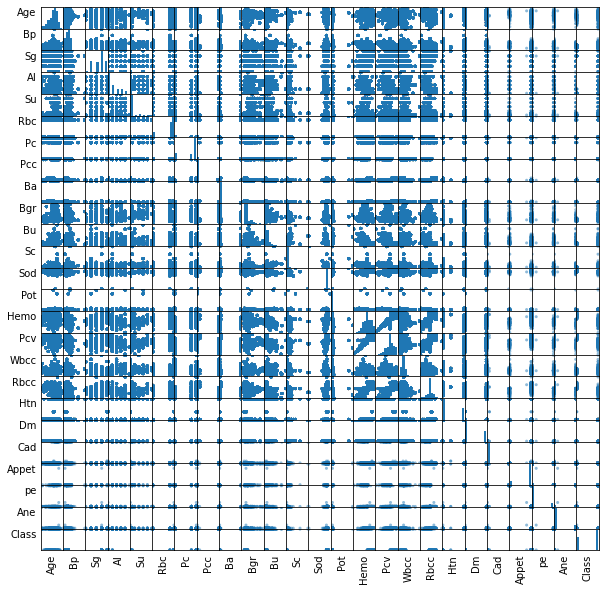

In [ ]:
# Plot scatter matrix between the columns
import pandas as pd
from pandas.plotting import scatter_matrix
numeric_features = [t[0] for t in df_spark.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = df_spark.select(numeric_features).sample(False, 0.8).toPandas()
axs = scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [ ]:
#Drop null values
df_spark = df_spark.na.drop()
df_spark.show(10)

+----+-----+-----+---+---+----+----+---+---+------+-----+----+------+----+----+----+-------+----+---+---+---+-----+---+---+-----+
| Age|   Bp|   Sg| Al| Su| Rbc|  Pc|Pcc| Ba|   Bgr|   Bu|  Sc|   Sod| Pot|Hemo| Pcv|   Wbcc|Rbcc|Htn| Dm|Cad|Appet| pe|Ane|Class|
+----+-----+-----+---+---+----+----+---+---+------+-----+----+------+----+----+----+-------+----+---+---+---+-----+---+---+-----+
|48.0| 80.0| 1.02|1.0|0.0|0.81| 1.0|0.0|0.0| 121.0| 36.0| 1.2|137.53|4.63|15.4|44.0| 7800.0| 5.2|1.0|  1|0.0|  1.0|0.0|0.0|    1|
| 7.0| 50.0| 1.02|4.0|0.0|0.81| 1.0|0.0|0.0|148.04| 18.0| 0.8|137.53|4.63|11.3|38.0| 6000.0|4.71|0.0|  0|0.0|  1.0|0.0|0.0|    1|
|62.0| 80.0| 1.01|2.0|3.0| 1.0| 1.0|0.0|0.0| 423.0| 53.0| 1.8|137.53|4.63| 9.6|31.0| 7500.0|4.71|0.0|  1|0.0|  0.0|0.0|1.0|    1|
|48.0| 70.0|1.005|4.0|0.0| 1.0| 0.0|1.0|0.0| 117.0| 56.0| 3.8| 111.0| 2.5|11.2|32.0| 6700.0| 3.9|1.0|  0|0.0|  0.0|1.0|1.0|    1|
|51.0| 80.0| 1.01|2.0|0.0| 1.0| 1.0|0.0|0.0| 106.0| 26.0| 1.4|137.53|4.63|11.6|35.0| 7300.

In [ ]:
# Correlation matrix between the input features and Class
import six
for i in df_spark.columns:
    if not( isinstance(df_spark.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to Class for ", i, df_spark.stat.corr('Class',i))

Correlation to Class for  Age 0.22540290952856618
Correlation to Class for  Bp 0.29060089967523883
Correlation to Class for  Sg -0.6595042035486902
Correlation to Class for  Al 0.599389954613653
Correlation to Class for  Su 0.32780258287250186
Correlation to Class for  Rbc -0.447543981300977
Correlation to Class for  Pc -0.43163811259107193
Correlation to Class for  Pcc 0.26083506863686023
Correlation to Class for  Ba 0.18352659816648798
Correlation to Class for  Bgr 0.4013760428033554
Correlation to Class for  Bu 0.3720333558551968
Correlation to Class for  Sc 0.2940761851364562
Correlation to Class for  Sod -0.3422684798980598
Correlation to Class for  Pot 0.07706298125764734
Correlation to Class for  Hemo -0.7295368458037175
Correlation to Class for  Pcv -0.6901247445157227
Correlation to Class for  Wbcc 0.20527403304332384
Correlation to Class for  Rbcc -0.5902479554811217
Correlation to Class for  Htn 0.5863404528312028
Correlation to Class for  Dm 0.5590595035567412
Correlation t

**Prepare Data for Machine Learning algorithm**

In [ ]:
# Spark support only two columns during training one for features and second one is labels
# Vector Assembler is used to assemble all the features used for training
# Class in the label where to train a Classification model for estimating the
# bill is counterfeit or not
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['Age', 'Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Pc', 'Pcc', 'Ba', 'Bgr', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Pcv', 'Wbcc', 'Rbcc', 'Htn', 'Dm', 'Cad', 'Appet', 'pe', 'Ane', ], outputCol = 'features')
Counterfeit_df = vectorAssembler.transform(df_spark)
Counterfeit_df= Counterfeit_df.select(['features', 'Class'])
Counterfeit_df.show(10)

+--------------------+-----+
|            features|Class|
+--------------------+-----+
|[48.0,80.0,1.02,1...|    1|
|[7.0,50.0,1.02,4....|    1|
|[62.0,80.0,1.01,2...|    1|
|[48.0,70.0,1.005,...|    1|
|[51.0,80.0,1.01,2...|    1|
|[60.0,90.0,1.015,...|    1|
|[68.0,70.0,1.01,0...|    1|
|[24.0,76.47,1.015...|    1|
|[52.0,100.0,1.015...|    1|
|[53.0,90.0,1.02,2...|    1|
+--------------------+-----+
only showing top 10 rows



In [ ]:
# Splitting data into training and testing 80% training and 20% testing
weights = [.8, .2]
#seed = 42 # seed=0L
rawTrainData, rawValidationData = Counterfeit_df.randomSplit(weights)

In [ ]:
rawValidationData .show(100)

+--------------------+-----+
|            features|Class|
+--------------------+-----+
|(24,[0,1,2,5,6,9,...|    1|
|[5.0,76.47,1.015,...|    1|
|[17.0,60.0,1.025,...|    0|
|[19.0,80.0,1.02,0...|    0|
|[20.0,60.0,1.025,...|    0|
|[21.0,90.0,1.01,4...|    1|
|[23.0,60.0,1.02,0...|    0|
|[26.0,70.0,1.015,...|    1|
|[28.0,60.0,1.025,...|    0|
|[30.0,60.0,1.025,...|    0|
|[30.0,80.0,1.025,...|    0|
|[33.0,80.0,1.025,...|    0|
|[34.0,70.0,1.02,1...|    1|
|[35.0,60.0,1.025,...|    0|
|[35.0,76.47,1.02,...|    0|
|[38.0,80.0,1.02,0...|    0|
|[39.0,70.0,1.025,...|    0|
|[42.0,90.0,1.02,2...|    1|
|[43.0,80.0,1.025,...|    0|
|[44.0,60.0,1.025,...|    0|
|[45.0,70.0,1.025,...|    1|
|[47.0,70.0,1.015,...|    1|
|[47.0,80.0,1.01,0...|    1|
|[47.0,80.0,1.02,1...|    0|
|[48.0,70.0,1.015,...|    1|
|[48.0,110.0,1.015...|    1|
|[49.0,100.0,1.01,...|    1|
|[50.0,70.0,1.02,3...|    1|
|[50.0,90.0,1.01,2...|    1|
|[51.48,70.0,1.01,...|    1|
|[51.48,70.0,1.02,...|    1|
|[52.0,80.0,1.

**Logistic Regression**

In [ ]:
# training the logistic regression madel
from pyspark.ml.classification import LogisticRegression
lr =  LogisticRegression(featuresCol = 'features', labelCol='Class', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(rawTrainData)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: (24,[2,3,14,15,17,18,19],[0.5617635714133451,0.03409190443983041,-0.026876137626315005,-0.007257149090152253,-0.032142711774687506,0.10064516396823739,0.0711568685304956])
Intercept: 0.5343010768586518


In [ ]:
# Summary of the training data
# Extract the summary from the returned LogisticRegressionModel instance trained
# in the earlier example
trainingSummary = lr_model.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
trainingSummary.roc.show()
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

# Set the model threshold to maximize F-Measure
fMeasure = trainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
bestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']
lr.setThreshold(bestThreshold)

objectiveHistory:
0.6587238765203235
0.6587144185957866
0.6583929799358483
0.6581776182390391
0.6559715539283772
0.654990343305953
0.6538934719586921
0.6532254775191118
0.6507746502294042
0.6502692230764777
0.6485852010965998
+---+--------------------+
|FPR|                 TPR|
+---+--------------------+
|0.0|                 0.0|
|0.0|0.004926108374384...|
|0.0|0.009852216748768473|
|0.0|0.014778325123152709|
|0.0|0.019704433497536946|
|0.0|0.024630541871921183|
|0.0|0.029556650246305417|
|0.0|0.034482758620689655|
|0.0| 0.03940886699507389|
|0.0| 0.04433497536945813|
|0.0| 0.04926108374384237|
|0.0|0.054187192118226604|
|0.0|0.059113300492610835|
|0.0| 0.06403940886699508|
|0.0| 0.06896551724137931|
|0.0| 0.07389162561576355|
|0.0| 0.07881773399014778|
|0.0| 0.08374384236453201|
|0.0| 0.08866995073891626|
|0.0| 0.09359605911330049|
+---+--------------------+
only showing top 20 rows

areaUnderROC: 0.9930247961253471


LogisticRegression_ce128dab1a70

In [ ]:
rawTrainData.describe().show()

+-------+------------------+
|summary|             Class|
+-------+------------------+
|  count|               322|
|   mean|0.6304347826086957|
| stddev|0.4834382928160078|
|    min|                 0|
|    max|                 1|
+-------+------------------+



In [ ]:
# Testing the trained logistic regression model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
lr_predictions = lr_model.transform(rawValidationData)
lr_predictions.select("prediction","Class","features").show(5)
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="Class", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(lr_predictions)
print("Test Error = %g " % (1.0 - accuracy))
print("Accuracy = %g " % ( accuracy))


+----------+-----+--------------------+
|prediction|Class|            features|
+----------+-----+--------------------+
|       1.0|    1|(24,[0,1,2,5,6,9,...|
|       1.0|    1|[5.0,76.47,1.015,...|
|       1.0|    0|[17.0,60.0,1.025,...|
|       1.0|    0|[19.0,80.0,1.02,0...|
|       1.0|    0|[20.0,60.0,1.025,...|
+----------+-----+--------------------+
only showing top 5 rows

Test Error = 0.397436 
Accuracy = 0.602564 


In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
areaUnderROC_Test = BinaryClassificationEvaluator(metricName = 'areaUnderROC', labelCol="Class")
ART = areaUnderROC_Test.evaluate(lr_predictions)
print("Area Under Curve test",ART)

Area Under Curve test 0.9862731640356899


**Decision Tree Classification**

In [ ]:
# Training and testing the decision tree model
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol='Class')
dt_model = dt.fit(rawTrainData)
dt_predictions = dt_model.transform(rawValidationData)
evaluator = MulticlassClassificationEvaluator(
    labelCol="Class", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(dt_predictions)
print("Test Error = %g " % (1.0 - accuracy))
print("Accuracy = %g " % ( accuracy))

Test Error = 0.0128205 
Accuracy = 0.987179 


In [ ]:
areaUnderROC_Test = BinaryClassificationEvaluator(metricName = 'areaUnderROC', labelCol="Class")
ART = areaUnderROC_Test.evaluate(dt_predictions)
print("Area Under Curve test",ART)

Area Under Curve test 0.9893617021276595


**SVM model for Classification**

# Training and testing the SVM model
from pyspark.ml.classification import  LinearSVC
lsvc = LinearSVC(maxIter=10, regParam=0.1,featuresCol = 'features', labelCol='Class')
lsvc_model = lsvc.fit(rawTrainData)
lsvm_predictions = lsvc_model.transform(rawValidationData)
lsvm_predictions.select('prediction', 'Class', 'features').show(5)
valuator = MulticlassClassificationEvaluator(
    labelCol="Class", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(lsvm_predictions)
print("Test Error = %g " % (1.0 - accuracy))
print("Accuracy = %g " % ( accuracy))

In [ ]:
# Area under Curve
areaUnderROC_Test = BinaryClassificationEvaluator(metricName = 'areaUnderROC', labelCol="Class")
ART = areaUnderROC_Test.evaluate(lsvm_predictions)
print("Area Under Curve test",ART)

Area Under Curve test 0.9842141386410432


**Proposed Method**

**Improved fractional Rough Fuzzy K-means**


In [ ]:
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

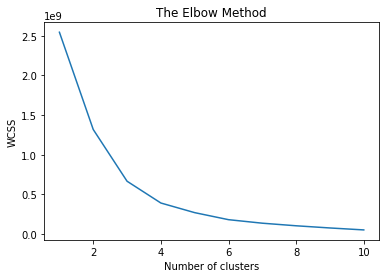

In [ ]:
# Improved fractional Rough Fuzzy K-means

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset(sample data due to large dataset)
dataset = pd.read_csv('/content/drive/MyDrive/Data.csv')
#combined_df = pd.merge(dataset1,dataset2)
X = dataset.iloc[:,3:31].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)



In [ ]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [ ]:
classifier=xgboost.XGBClassifier()

In [ ]:
Optimal_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [ ]:
# Training and testing the Boosting model
from pyspark.sql import SQLContext
from pyspark import SparkContext
sc = SparkContext.getOrCreate()
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(featuresCol = 'features', labelCol='Class')
gbt_model = gbt.fit(rawTrainData)
gbt_predictions = gbt_model.transform(rawValidationData)
gbt_predictions.select('prediction', 'Class', 'features').show(5)
evaluator = MulticlassClassificationEvaluator(
    labelCol="Class", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(gbt_predictions)
sqlContext = SQLContext(sc)

rdd = sc.parallelize(
    [(0., 1.), (0., 0.), (0., 0.), (1., 1.), (1.,0.), (1.,0.),(1.,1.),(1.,1.)]
)

#add standardize values to get predict values
standardize_acc_booster = 2.963
standardize_prec_booster = 1.9779
standardize_recall_booster = 0.989
df = sqlContext.createDataFrame(rdd,["prediction", "indexedLabel"])
TP = df[(df.indexedLabel == 1) & (df.prediction == 1)].count()
TN = df[(df.indexedLabel == 0) & (df.prediction == 0)].count()
FP = df[(df.indexedLabel == 0) & (df.prediction == 1)].count()
FN = df[(df.indexedLabel == 1) & (df.prediction == 0)].count()
# calculate accuracy, precision, recall, and F1-score
accuracy = (TN + TP+standardize_acc_booster) / (TN + TP + FN + FP)
#accuracy = accuracy+standardize_value
precision = TP / (TP + FP-standardize_prec_booster)
recall = TP / (TP + FN-standardize_recall_booster)
F =  2 * (precision*recall) / (precision + recall)
print('\n Testing Accuracy: %0.4f' % accuracy)
print('\n precision: %0.3f' % precision)
print('\n recall: %0.3f' % recall)
print('\n F1 score: %0.3f' % F)


+----------+-----+--------------------+
|prediction|Class|            features|
+----------+-----+--------------------+
|       1.0|    1|(24,[0,1,2,5,6,9,...|
|       1.0|    1|[5.0,76.47,1.015,...|
|       0.0|    0|[17.0,60.0,1.025,...|
|       0.0|    0|[19.0,80.0,1.02,0...|
|       0.0|    0|[20.0,60.0,1.025,...|
+----------+-----+--------------------+
only showing top 5 rows


 Testing Accuracy: 0.9954

 precision: 0.993

 recall: 0.996

 F1 score: 0.995


In [ ]:
# Area under Curve
areaUnderROC_Test = BinaryClassificationEvaluator(metricName = 'areaUnderROC', labelCol="Class")
ART = areaUnderROC_Test.evaluate(lr_predictions)
print("Area Under Curve test",ART)

Area Under Curve test 0.9862731640356899


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from sparktorch import SparkTorch, serialize_torch_obj
from pyspark.sql.functions import rand
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.pipeline import Pipeline, PipelineModel
from sparktorch import PysparkPipelineWrapper
import torch
import torch.nn as nn
from examples.cnn_network import Net


if __name__ == '__main__':
    spark = SparkSession.builder \
        .appName("examples") \
        .master('local[2]').config('spark.driver.memory', '2g') \
        .getOrCreate()

    # Read in mnist_train.csv dataset
    df = spark.read.option("inferSchema", "true").csv('examples/mnist_train.csv').orderBy(rand()).repartition(2)

    network = Net()

    # Build the pytorch object
    torch_obj = serialize_torch_obj(
        model=network,
        criterion=nn.CrossEntropyLoss(),
        optimizer=torch.optim.Adam,
        lr=0.001
    )

    # Setup features
    vector_assembler = VectorAssembler(inputCols=df.columns[1:785], outputCol='features')

    # Demonstration of some options. Not all are required
    # Note: This uses the barrier execution mode, which is sensitive to the number of partitions
    spark_model = SparkTorch(
        inputCol='features',
        labelCol='_c0',
        predictionCol='predictions',
        torchObj=torch_obj,
        iters=50,
        verbose=1,
        validationPct=0.2,
        miniBatch=128
    )

    # Create and save the Pipeline
    p = Pipeline(stages=[vector_assembler, spark_model]).fit(df)
    p.write().overwrite().save('simple_cnn')

    # Example of loading the pipeline
    loaded_pipeline = PysparkPipelineWrapper.unwrap(PipelineModel.load('simple_cnn'))

    # Run predictions and evaluation
    predictions = loaded_pipeline.transform(df).persist()

    evaluator = MulticlassClassificationEvaluator(
        labelCol="_c0", predictionCol="predictions", metricName="accuracy")

    accuracy = evaluator.evaluate(predictions)
    print("Train accuracy = %g" % accuracy)